<h1 style="text-align: center;">Deep Learning<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
# Get python version
!python --version

Python 3.9.7


In [5]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.10.1'

In [6]:
sns.__version__

'0.13.2'

In [7]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [8]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Thu Apr 25 19:54:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.09                 Driver Version: 546.09       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   65C    P0              22W /  80W |    334MiB /  6144MiB |     28%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
tf.random.set_seed(SEED)

# "TF_DETERMINISTIC_OPS" to "1". This is a TensorFlow feature that, when a random seed is set,
# makes the operations deterministic (i.e., less random). This can also help with reproducibility.
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [10]:
from sklearn.datasets import load_breast_cancer

In [11]:
cancer = load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
print(cancer["target_names"])

['malignant' 'benign']


In [14]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
df_feat = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [17]:
df_target = pd.DataFrame(cancer["target"], columns=["Cancer"])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [18]:
frames = [df_feat, df_target]
df = pd.concat(frames, axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [19]:
df.shape

(569, 31)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
if df.duplicated().sum().any() :
    print(f"{df.duplicated().sum()} of number of duplicates found in the data")
else:
    print(f"There is no dupIİcates in the data")

There is no dupIİcates in the data


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


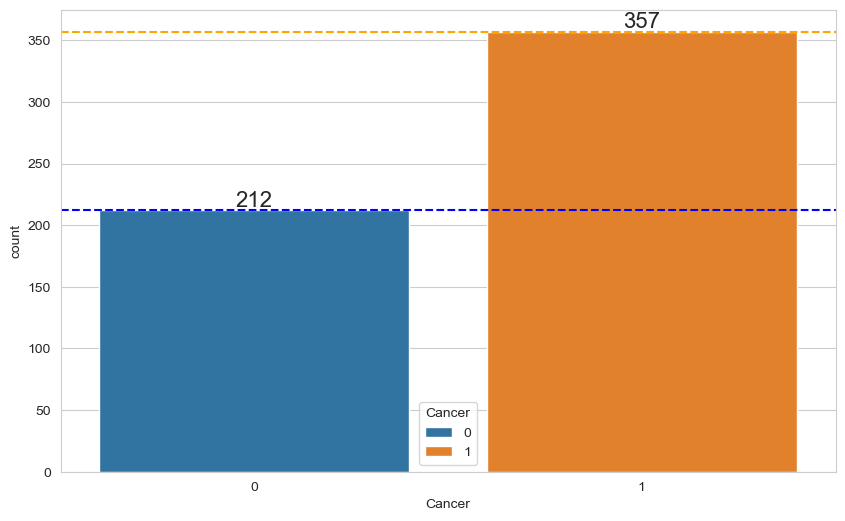

In [24]:
ax = sns.countplot(x="Cancer", hue="Cancer", data=df)
for container in ax.containers:
    ax.bar_label(container, label_type="edge", size=16)
plt.axhline(y=df.Cancer.value_counts()[1], color="orange", linestyle="--")
plt.axhline(y=df.Cancer.value_counts()[0], color="blue", linestyle="--")
plt.show()

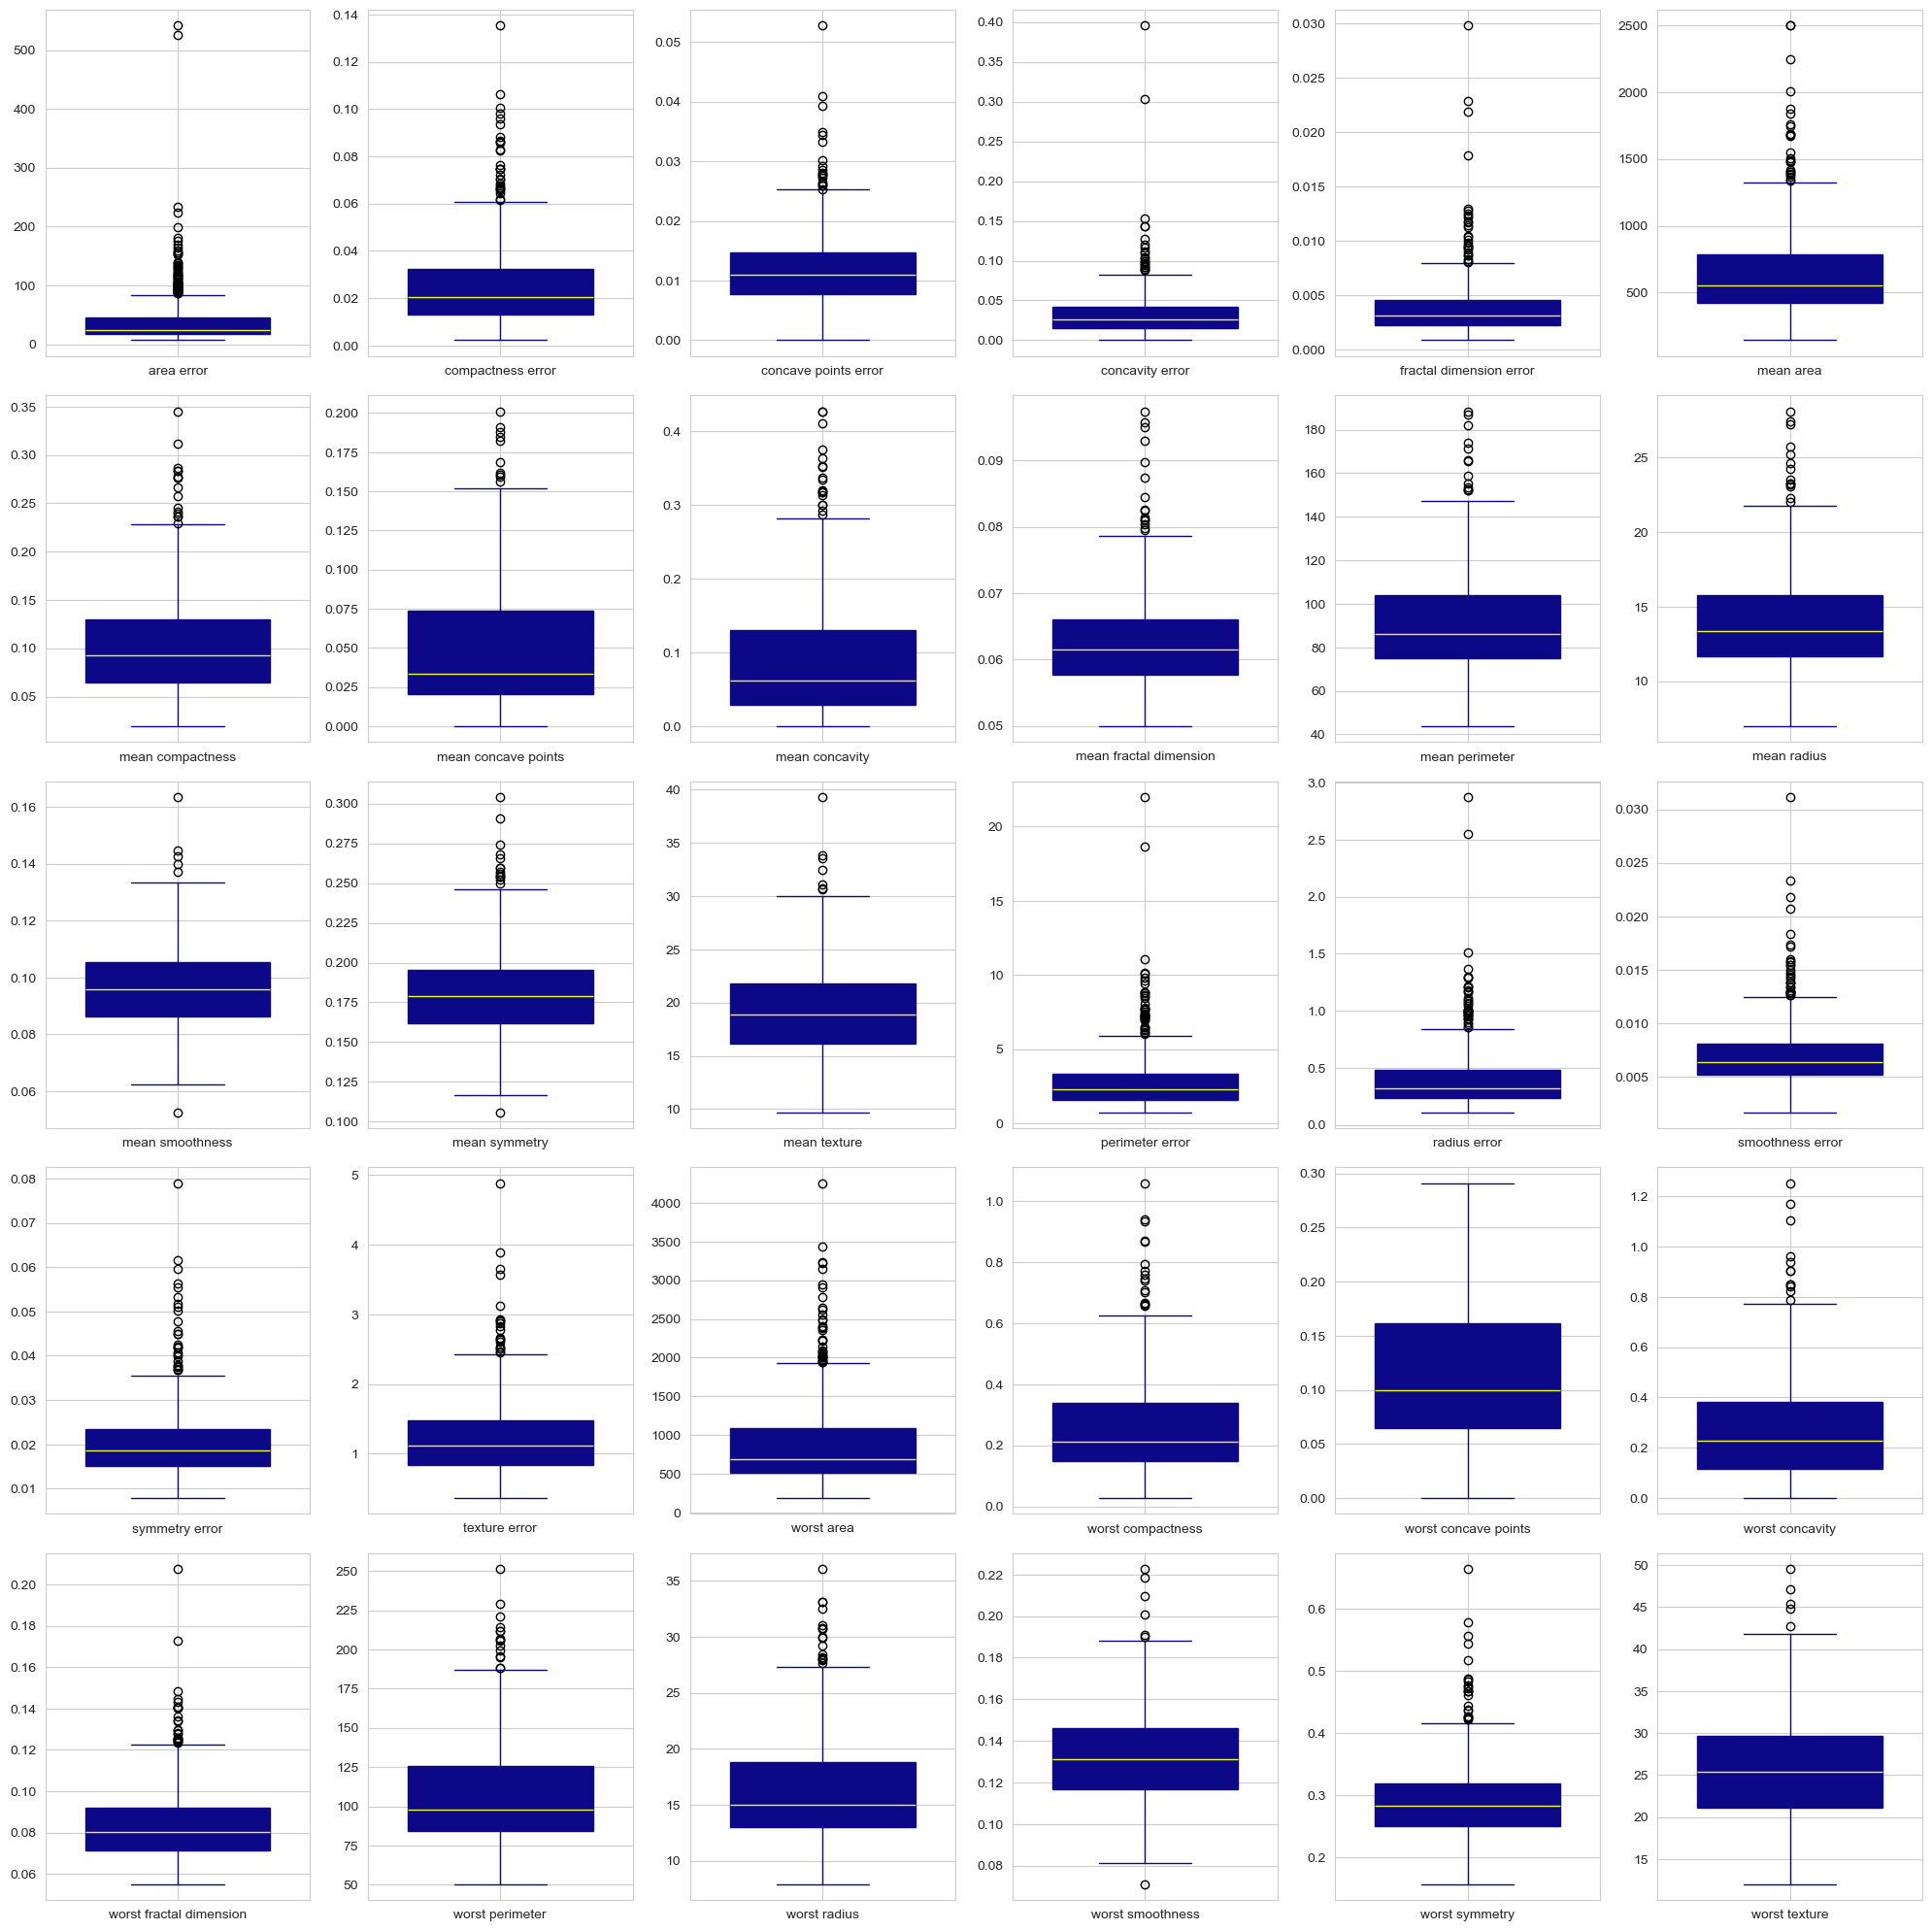

In [25]:
df.iloc[:,:-1].sort_index(axis=1).plot(kind="box",
                                       layout=(5, 6),
                                       subplots=True,
                                       widths=0.7,
                                       figsize=(20, 20),
                                       cmap="plasma",
                                       patch_artist=True)
plt.tight_layout()

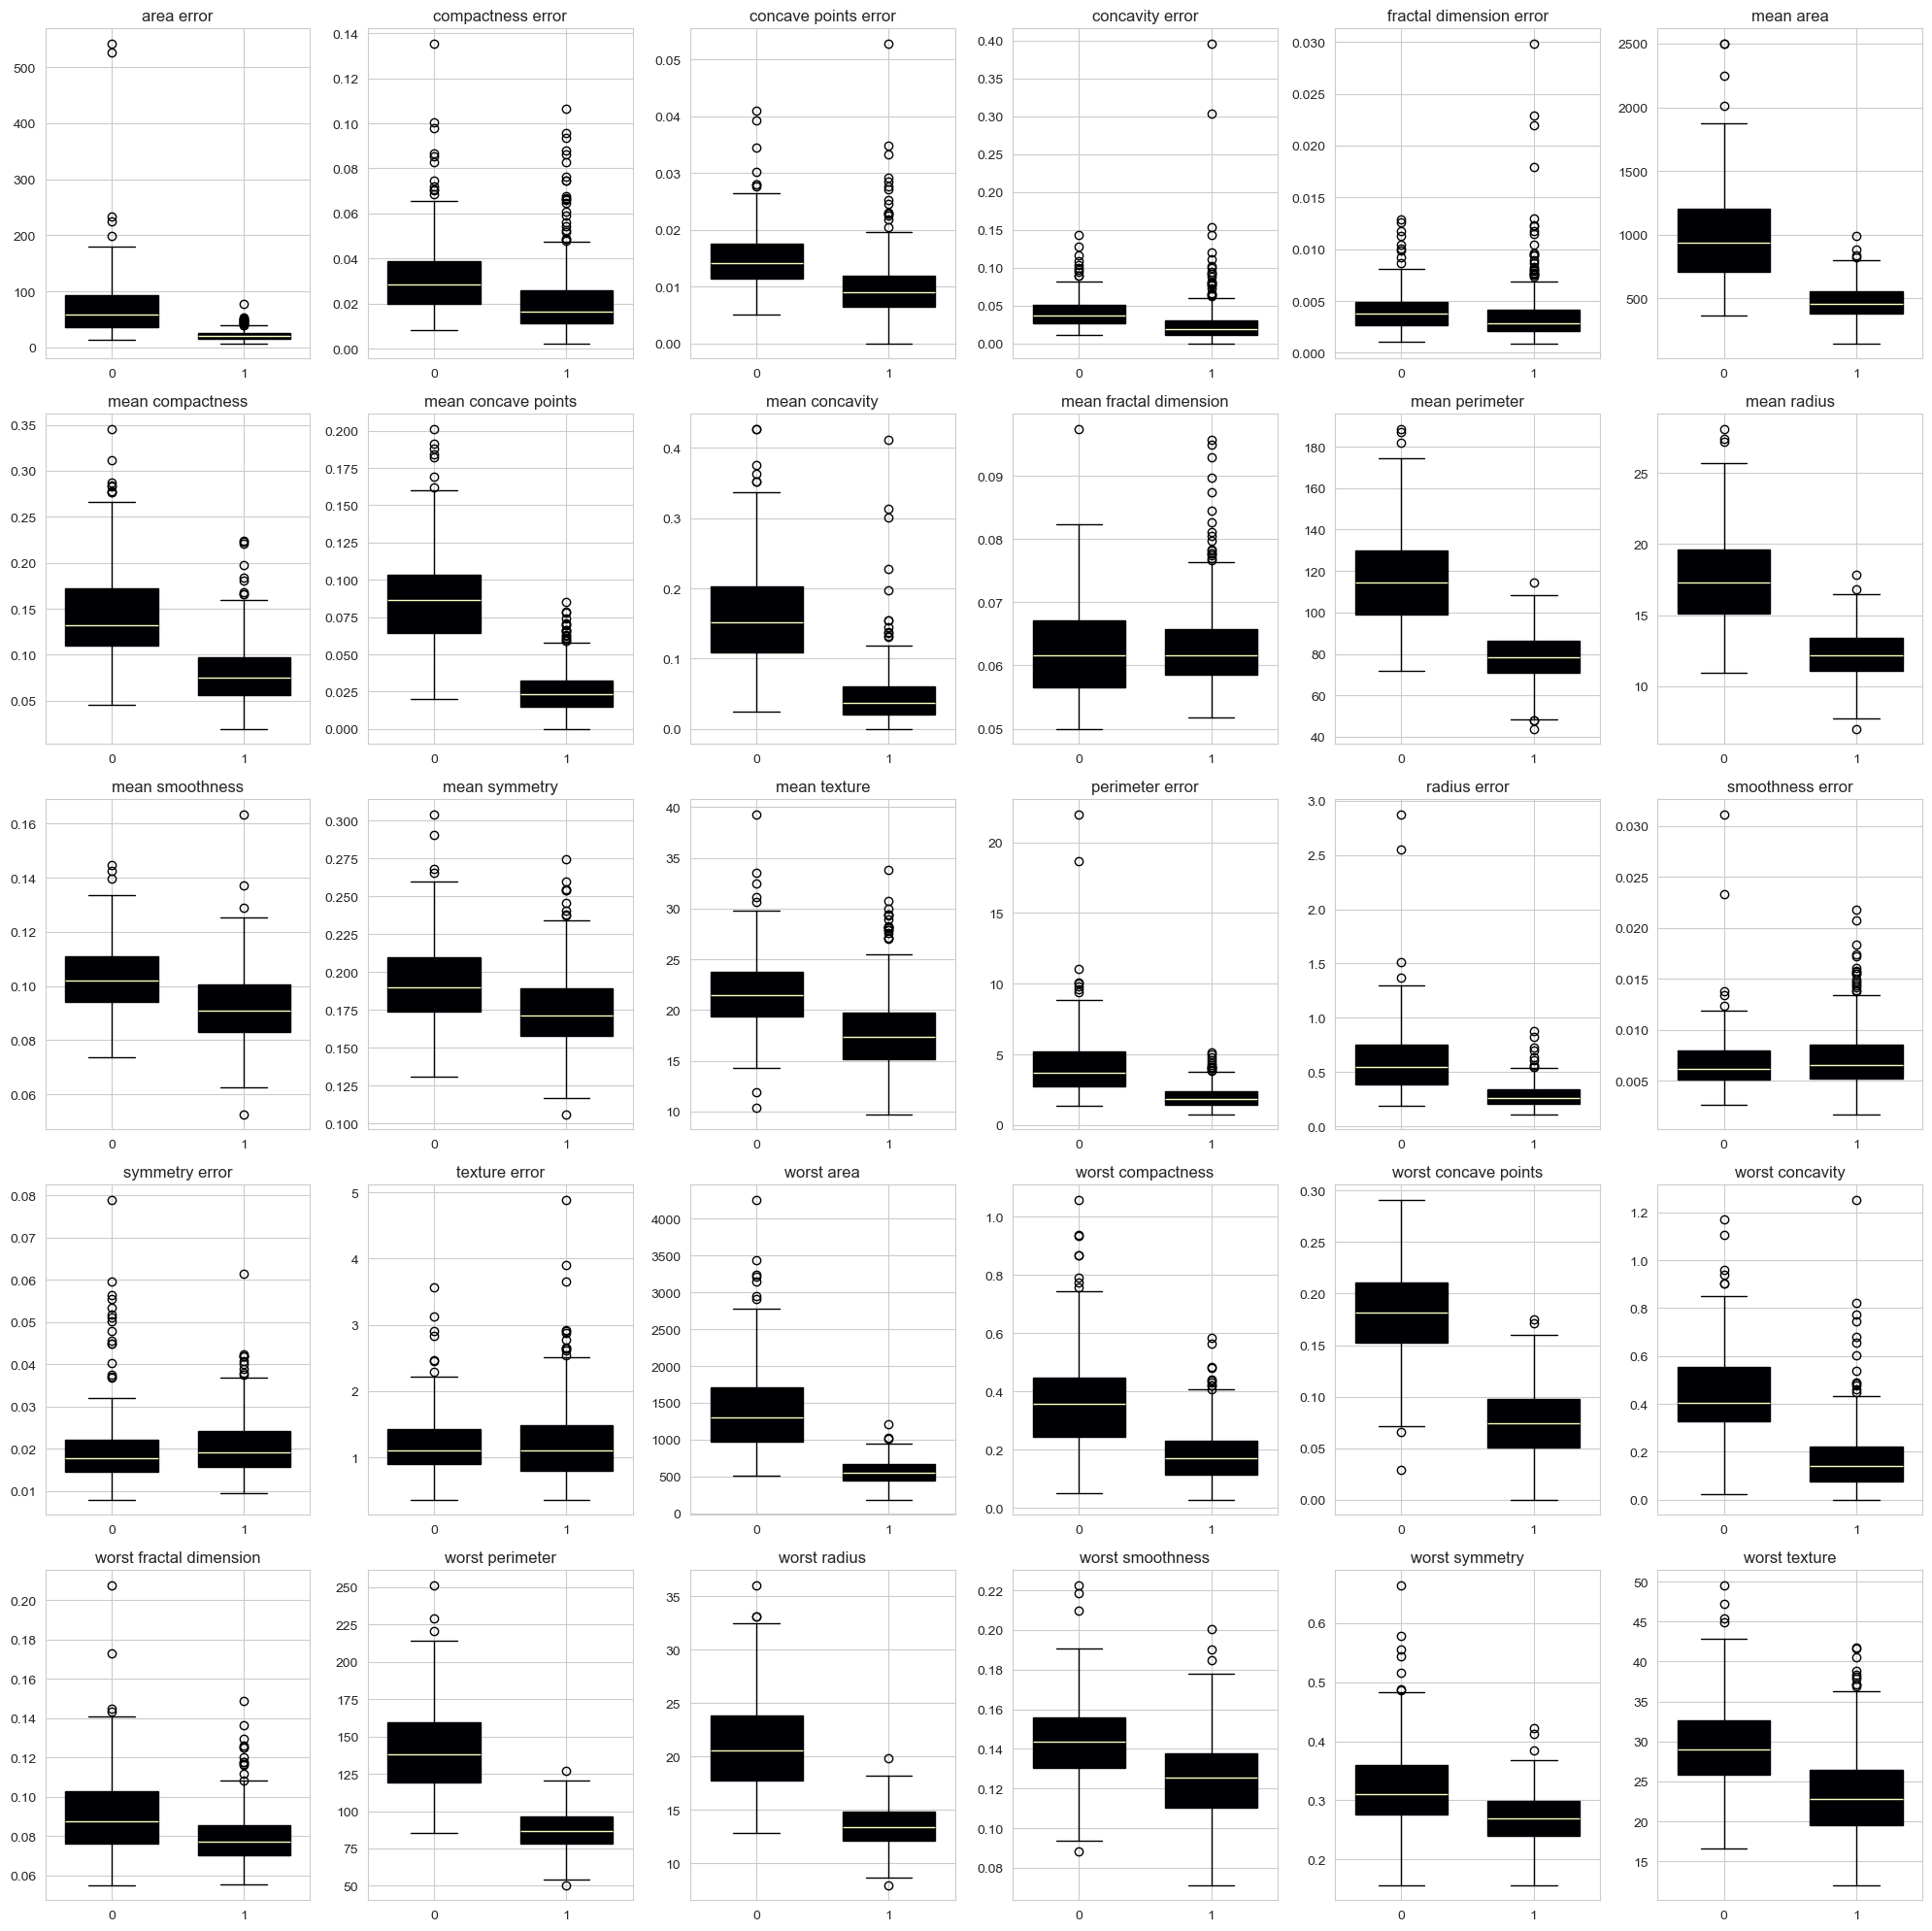

In [26]:
# We check Outliers not on feature base but error base, otherwise we can delete necessary data points
df.plot(kind="box",
        by="Cancer",
        layout=(5, 6),
        subplots=True,
        widths=0.7,
        figsize=(20, 20),
        cmap="magma",
        patch_artist=True)
plt.tight_layout()

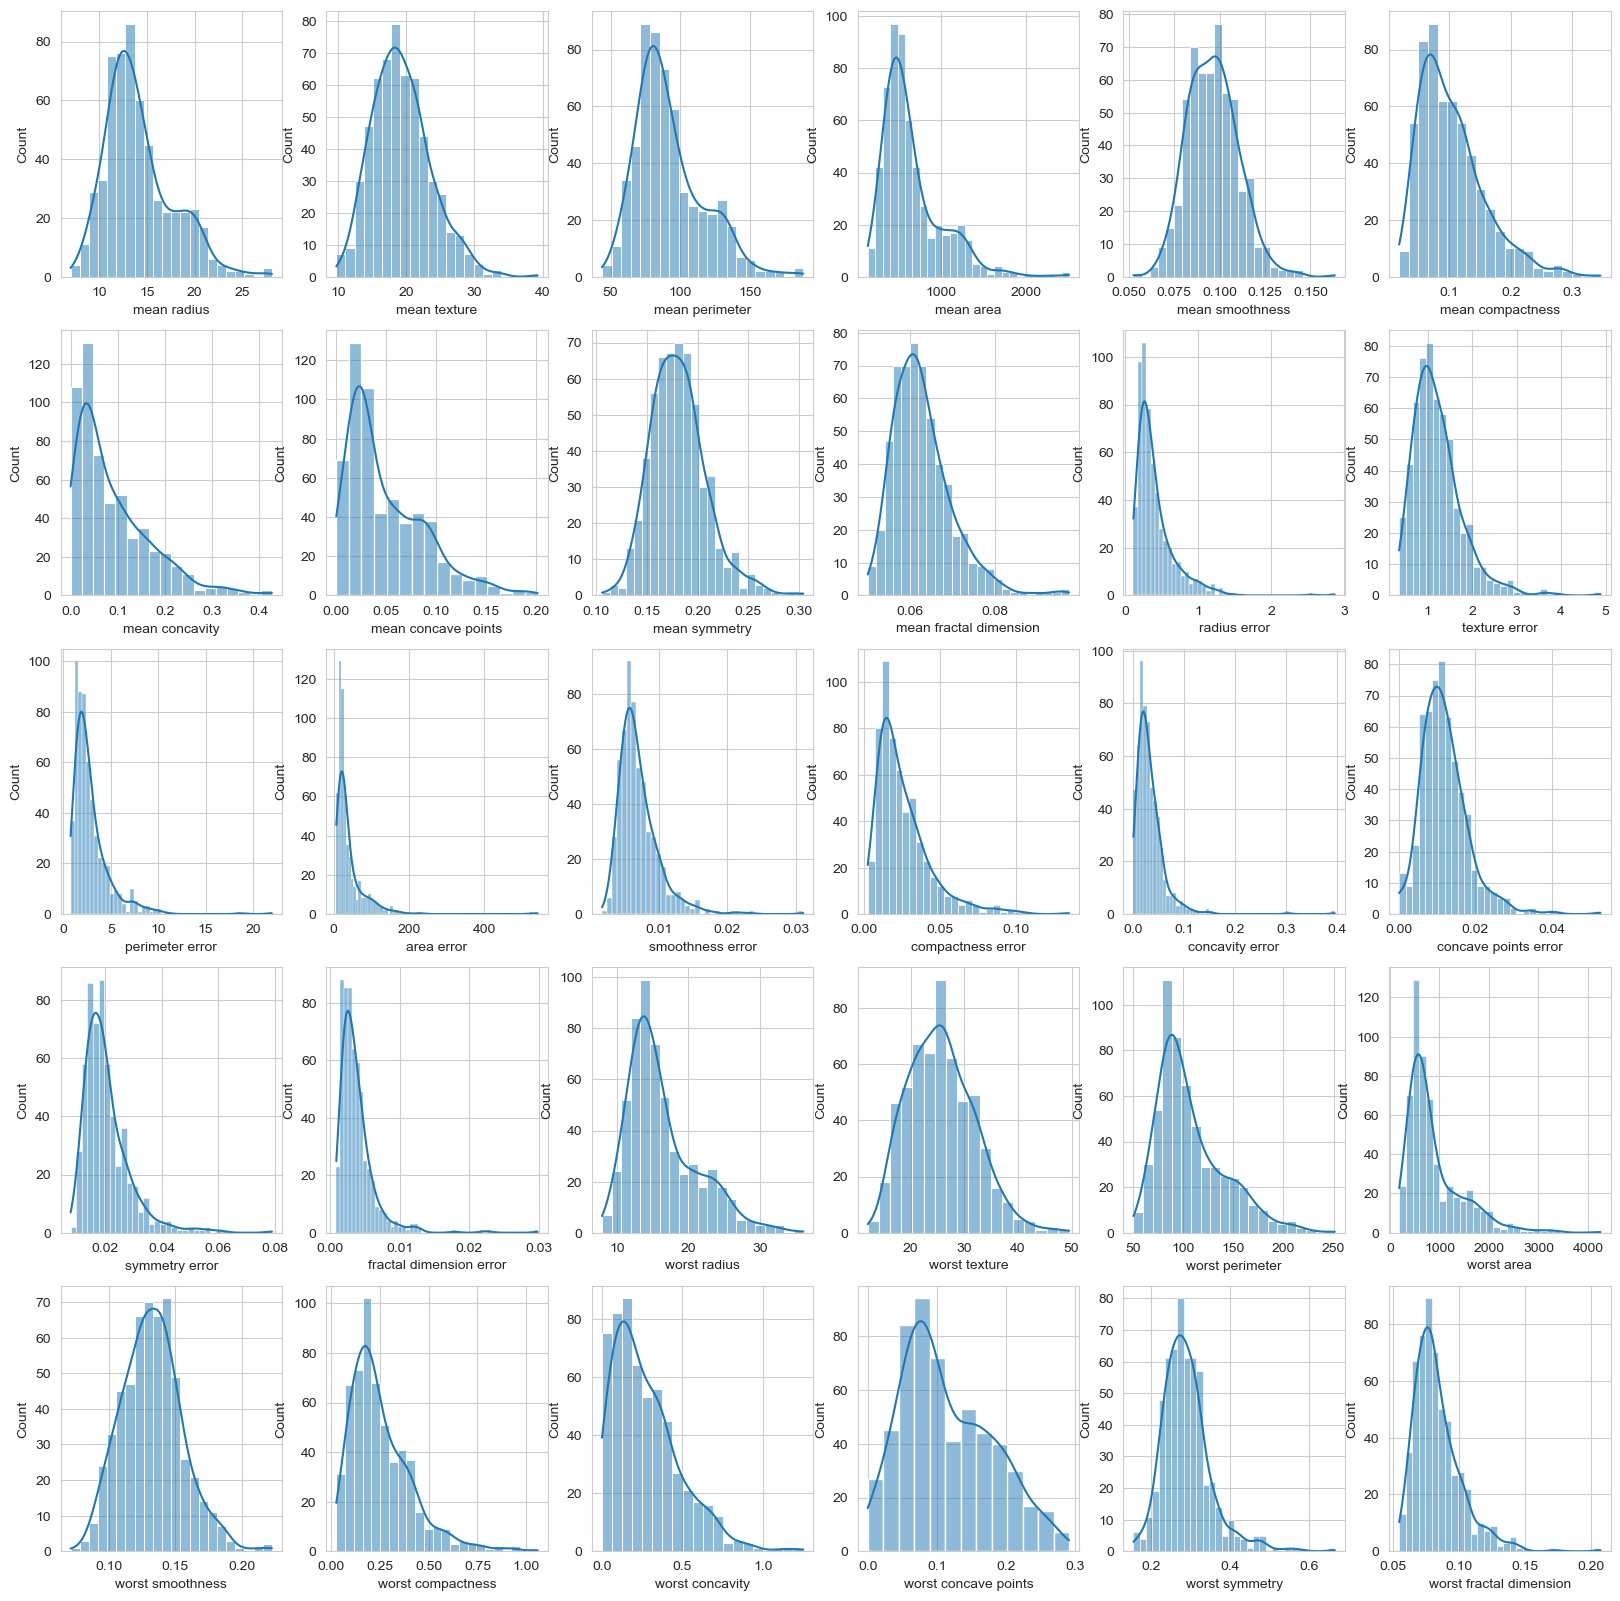

In [29]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include="number").columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df,x=col, kde=True)

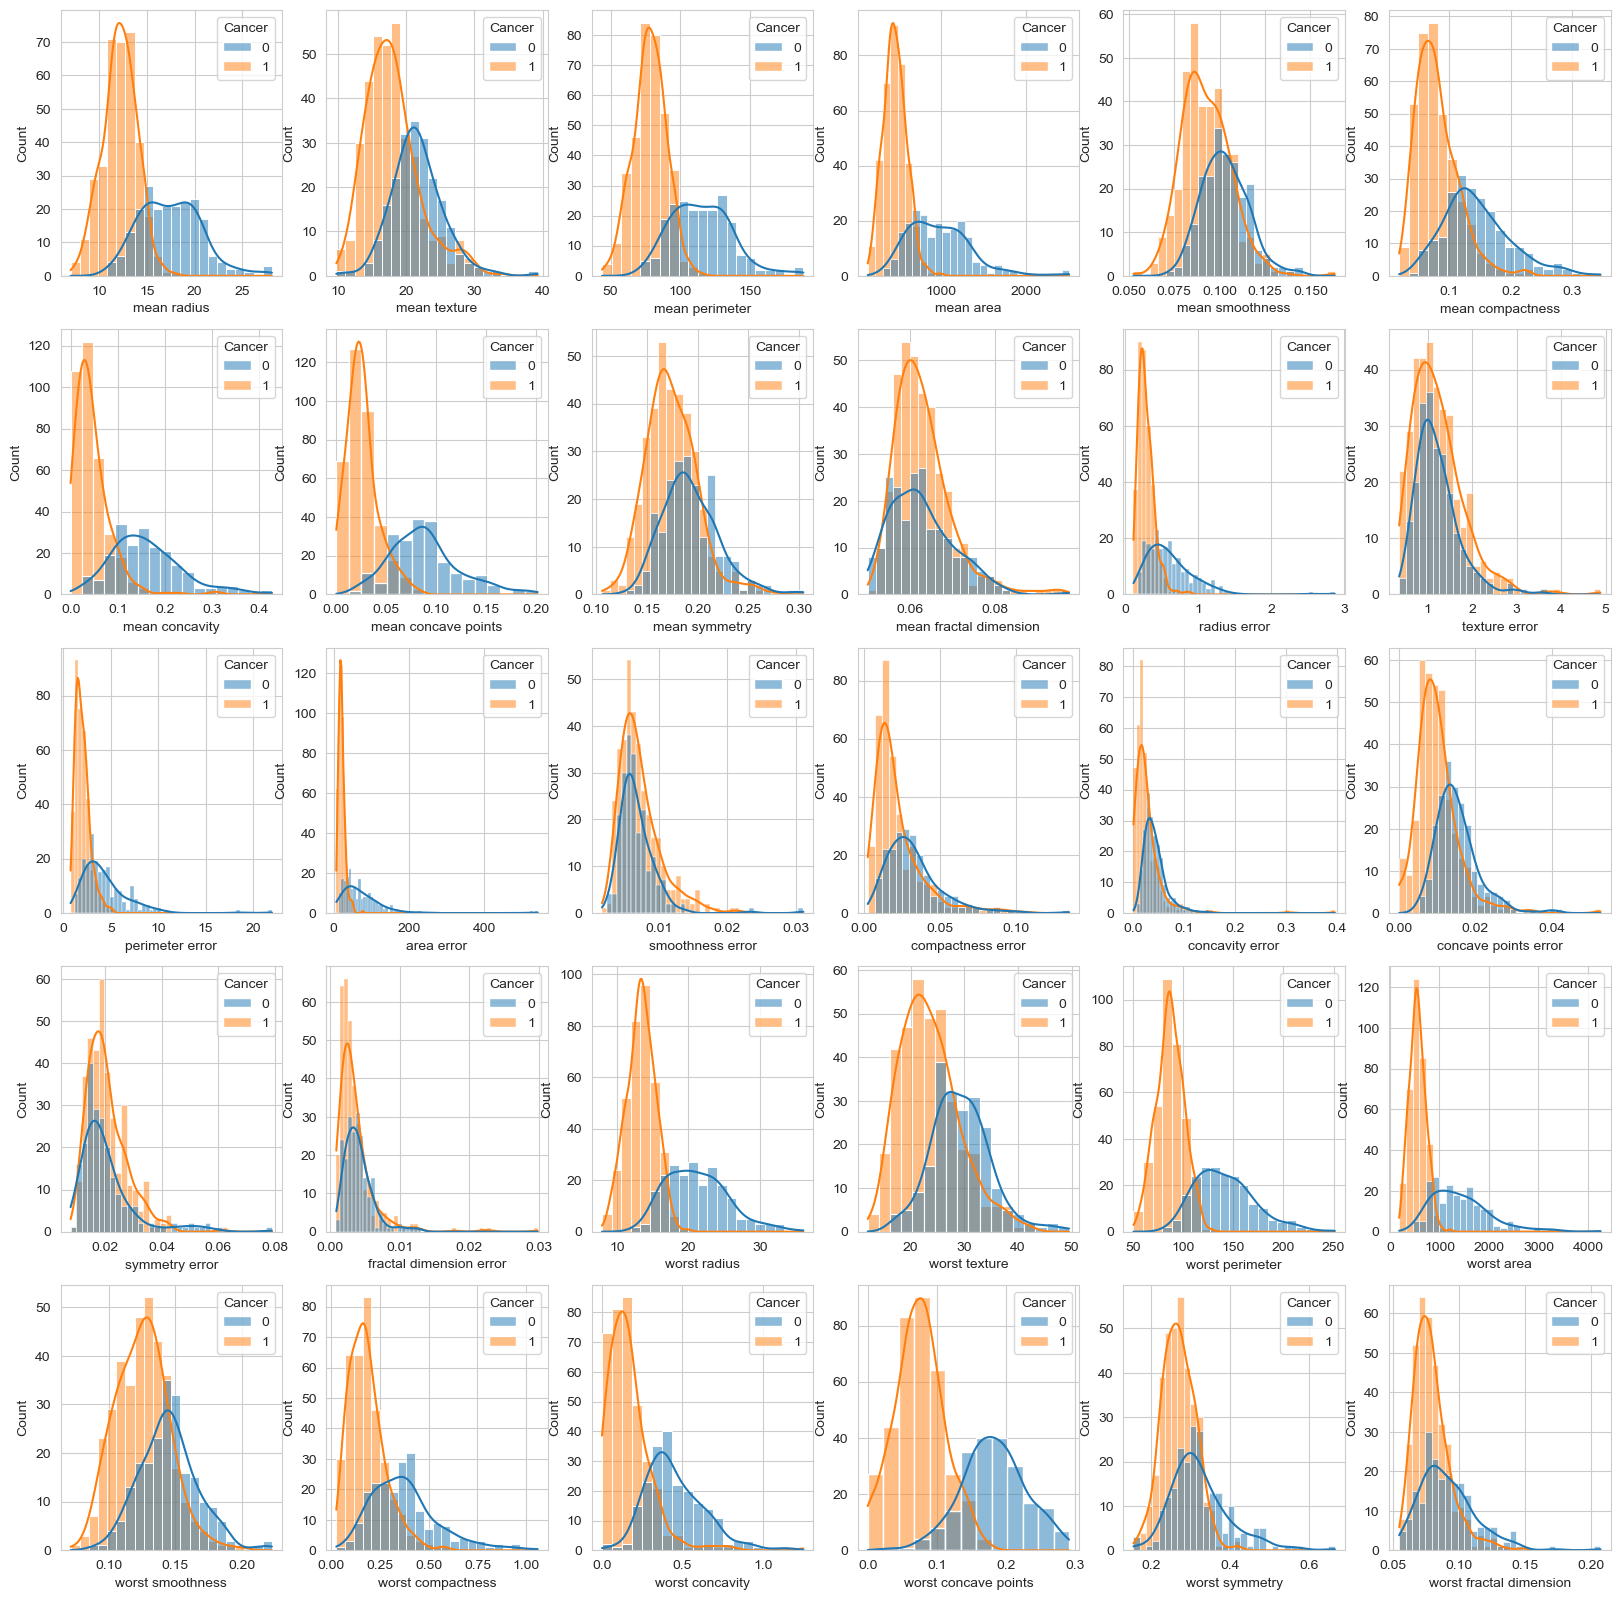

In [ ]:
# If we need feature selection we can drop intersecting features according to this graph. So, single graph cannot give us this information. That's why we should draw the graph with 0/1 classes division
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include="number").columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue="Cancer", kde=True)

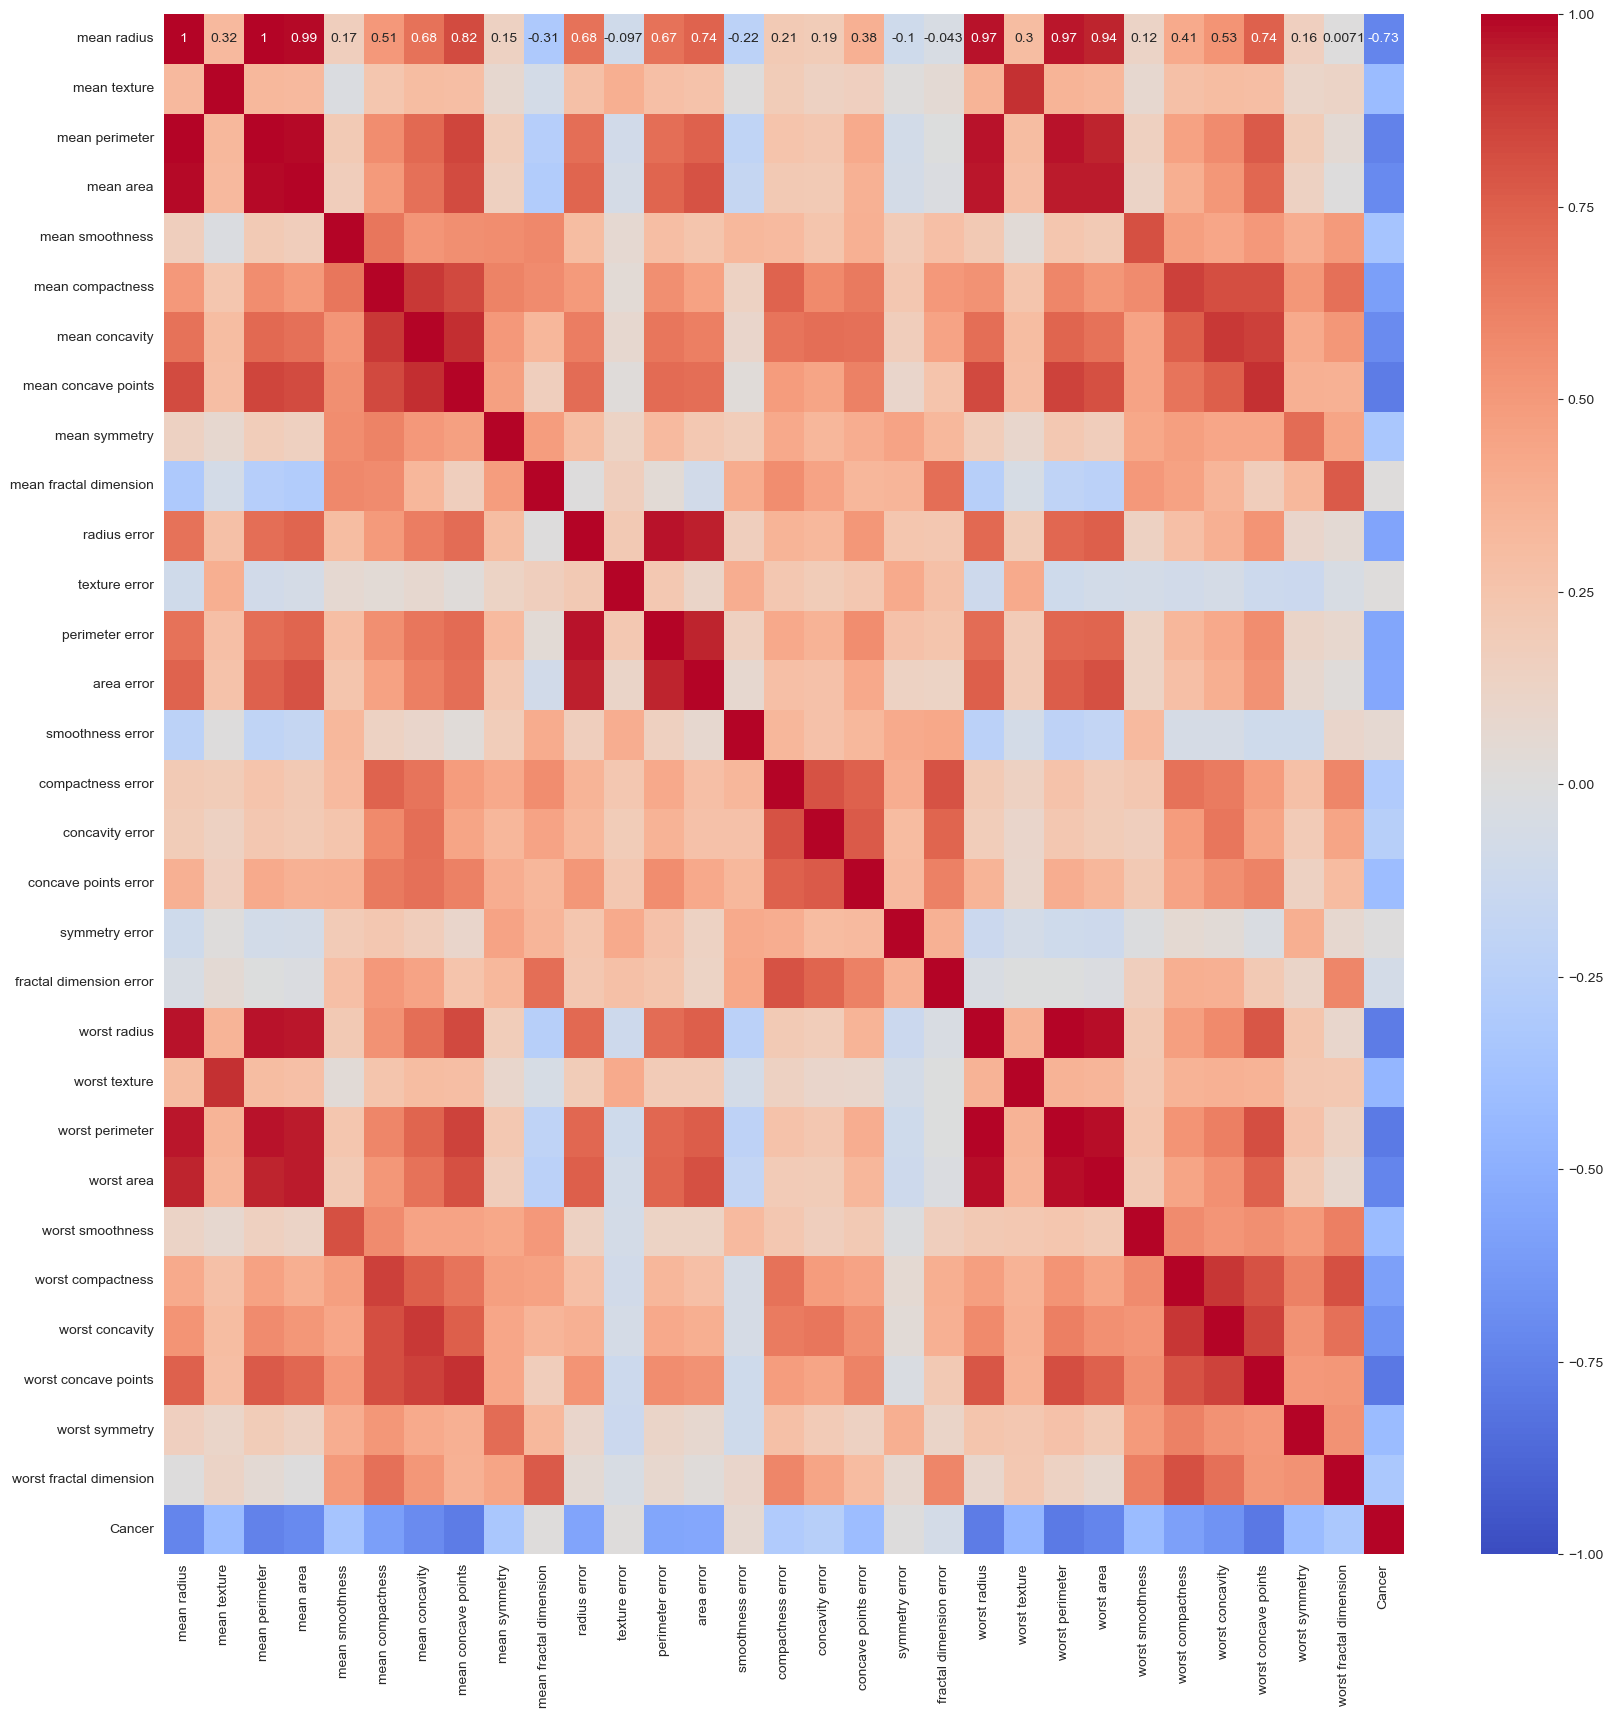

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [30]:
drop_list = [
    "worst perimeter",
    "worst area",
    "perimeter error",
    "area error",
    "mean perimeter",
    "mean area",
]

In [31]:
df = df.drop(drop_list, axis=1)

In [32]:
df.shape

(569, 25)

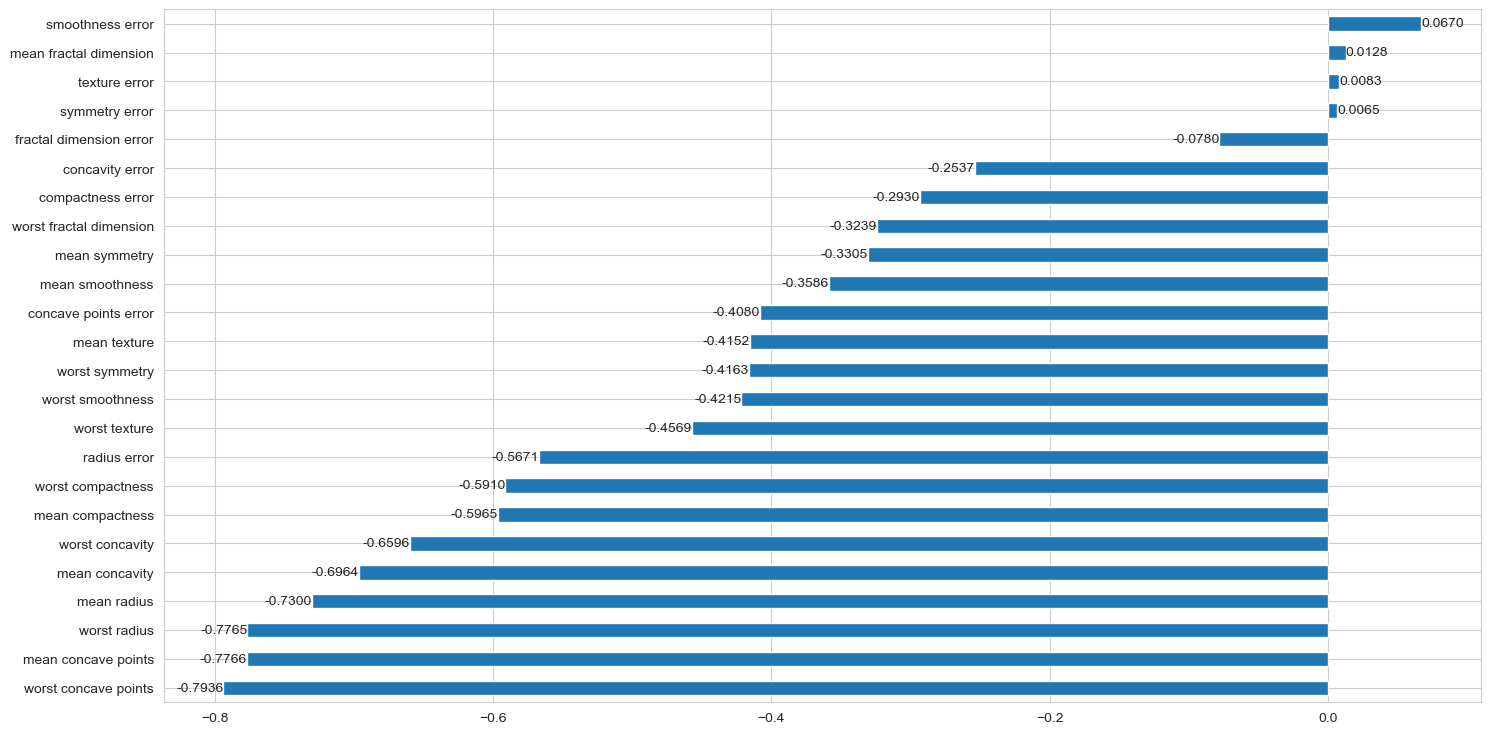

In [34]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Cancer"].sort_values().drop("Cancer").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

## Preprocessing of Data
1. Split the data into train and test sets.
2. Scale the dataset.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [36]:
X = df.drop("Cancer", axis=1)
y = df["Cancer"]

In [37]:
# In the normal world we don't use seed
seed = 42

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  # X and y are the input features and target labels
    stratify=y,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.10,  # Specify the proportion of data to be used for testing
    random_state=seed  # Set a random seed to ensure reproducibility
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,  # X_train and y_train are the remaining training data
    stratify=y_train,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.10,  # Specify the proportion of data to be used for validation
    random_state=seed  # Set a random seed to ensure reproducibility
)


In [39]:
# We have outliers. So, this is the best option
scaler = RobustScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate     #in deep learning normally we don't use cross validation
from sklearn.model_selection import GridSearchCV

In [42]:
batch_size = 32

In [43]:
# Set the random seed for reproducibility
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification. activation="softmax" yaparsak neuron sayisini 2 yapmamiz lazim. sonuclari 0 ve 1 lewr icin ayri aliriz bu durumda
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
# The model is trained using the fit method, which takes several arguments:
model.fit(
    # The training data is provided as x and y, where x is the input data and y is the target output.
    x=X_train, 
    y=y_train, 
    
    # The validation data is used to evaluate the model's performance during training.
    validation_data=(X_val, y_val), 
    
    # The batch size determines the number of samples that are processed before the model's weights are updated.
    batch_size=batch_size, 
    
    # The number of epochs specifies how many times the entire training dataset will be passed through the model.
    epochs=1000, 
    
    # The verbose parameter controls the amount of information that is printed during training.
    verbose=1
)

Epoch 1/1000
15/15 [==============================] - 3s 46ms/step - loss: 0.6341 - accuracy: 0.6239 - val_loss: 0.5610 - val_accuracy: 0.8654
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5040 - accuracy: 0.8891 - val_loss: 0.4461 - val_accuracy: 0.9615
Epoch 3/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3881 - accuracy: 0.9326 - val_loss: 0.3320 - val_accuracy: 0.9808
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2886 - accuracy: 0.9500 - val_loss: 0.2347 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2209 - accuracy: 0.9587 - val_loss: 0.1652 - val_accuracy: 0.9808
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.1761 - accuracy: 0.9609 - val_loss: 0.1214 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1467 - accuracy: 0.9652 - val_loss: 0.0937 - val_accuracy: 1.0000
Epoch

15/15 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.9870 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 20/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 21/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 22/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9891 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 23/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 24/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 25/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9891 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 26/100

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.634,0.624,0.561,0.865
1,0.504,0.889,0.446,0.962
2,0.388,0.933,0.332,0.981
3,0.289,0.950,0.235,0.981
4,0.221,0.959,0.165,0.981


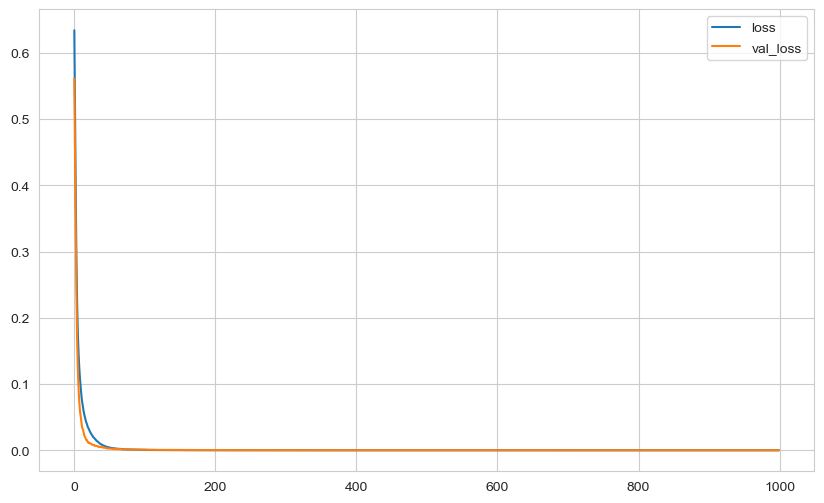

In [47]:
# If validation splits after certain value this means overfitting
loss_df[["loss","val_loss"]].plot()
plt.show()

In [48]:
model.evaluate(X_test, y_test, verbose=0)

[1.1208618879318237, 0.9298245906829834]

In [49]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  1.1208618879318237
accuracy:  0.9298245906829834


In [50]:
# these are the probability scores
y_pred = model.predict(X_test, verbose=0) 
y_pred

array([[7.9662643e-20],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.3711345e-20],
       [4.9230554e-11],
       [3.1816401e-06],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9879289e-01],
       [5.6117235e-29],
       [6.2962080e-21],
       [4.5399973e-18],
       [1.0000000e+00],
       [8.1634894e-20],
       [9.8811603e-01],
       [7.8237051e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.6570615e-32],
       [9.9998295e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3222841e-17],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.5032622e-23],
       [1.0000000e+00],
       [1.2054231e-03],
       [6.8348808e-15],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999642e-01],
       [5.7816718e-21],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.2474762e-02],
       [1.000000

In [51]:
# we define the treshhold here to convert 0 amd 1
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



### EarlyStopping

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
#We must reset the model. Otherwise it continues from where it left
# Set the random seed for reproducibility
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add a dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add a dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add a dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
# The patience is often set somewhere between 10 and 100
# (10 or 25 is more common), but it really depends on your dataset and network.

In [55]:
# Instantiate the EarlyStopping callback
early_stop = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",     # If this was 'val_accuracy' mode should be 'max'
    # Minimize the validation loss
    mode="min",
    # Print a message each time the callback is triggered
    verbose=1,
    # Wait for 10 epochs without improvement before stopping
    patience=10,
    # Restore the weights of the best model seen during training
    restore_best_weights=True
)

In [56]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=1000,
    # Set the verbosity level to display training progress
    verbose=1,
    # Add the early stopping callback to stop training when the validation loss plateaus
    callbacks=[early_stop],     #Callback works after every epoch
)

Epoch 1/1000
15/15 [==============================] - 1s 22ms/step - loss: 0.6502 - accuracy: 0.6348 - val_loss: 0.5330 - val_accuracy: 0.9038
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4790 - accuracy: 0.8739 - val_loss: 0.3950 - val_accuracy: 0.9423
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3624 - accuracy: 0.9196 - val_loss: 0.2840 - val_accuracy: 0.9808
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.2741 - accuracy: 0.9370 - val_loss: 0.2031 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2133 - accuracy: 0.9478 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.1716 - accuracy: 0.9500 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 7/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.1442 - accuracy: 0.9609 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch

15/15 [==============================] - 0s 9ms/step - loss: 0.0505 - accuracy: 0.9891 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 19/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.0471 - accuracy: 0.9891 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 20/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.0433 - accuracy: 0.9891 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 21/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0409 - accuracy: 0.9891 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 22/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9913 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 23/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9913 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 24/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.9913 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 25/100

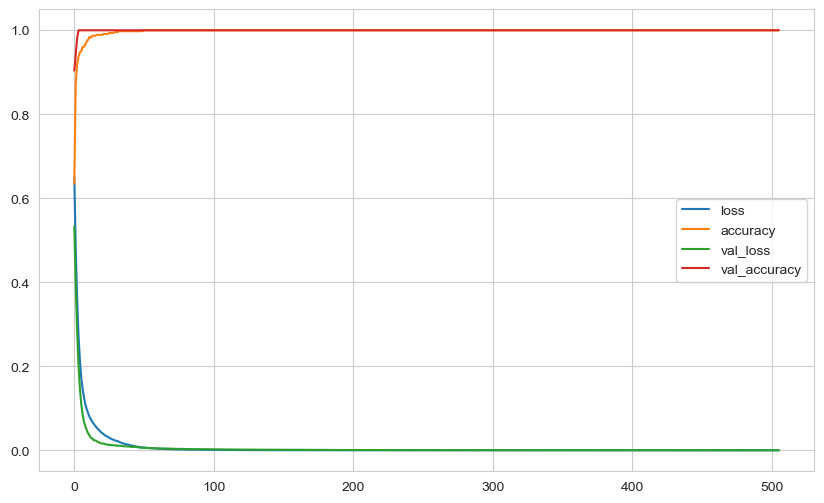

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6203985214233398
accuracy:  0.8947368264198303


In [59]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.94      0.89      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



### learning_rate

In [60]:
from tensorflow.keras.optimizers import Adam

In [61]:
# Set the random seed for reproducibility
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Create an Adam optimizer with a learning rate of 0.005
opt = Adam(learning_rate=0.005)

# Compile the model with the optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [62]:
# Instantiate the EarlyStopping callback
early_stop = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",
    # Minimize the validation loss
    mode="min",
    # Print a message each time the callback is triggered
    verbose=1,
    # Wait for 10 epochs without improvement before stopping
    patience=10,
    # Restore the weights of the best model seen during training
    restore_best_weights=True
)

In [63]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=1000,
    # Set the verbosity level to display training progress
    verbose=1,
    # Add the early stopping callback to stop training when the validation loss plateaus
    callbacks=[early_stop],
)

Epoch 1/1000
15/15 [==============================] - 1s 21ms/step - loss: 0.5342 - accuracy: 0.7000 - val_loss: 0.3526 - val_accuracy: 0.7500
Epoch 2/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.3000 - accuracy: 0.9261 - val_loss: 0.1526 - val_accuracy: 1.0000
Epoch 3/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.1539 - accuracy: 0.9565 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.0903 - accuracy: 0.9696 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0481 - accuracy: 0.9870 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 7/1000
13/15 [=========================>....] - ETA: 0s - loss: 0.0355 - accuracy: 0.9904

15/15 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9891 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 8/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 9/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 10/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 11/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0271 - accuracy: 0.9891 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 12/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 13/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 14/1000
1

<Axes: >

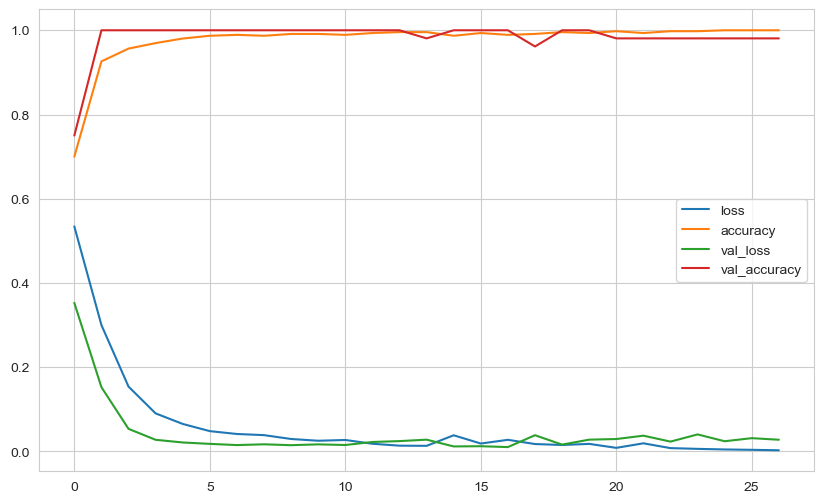

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [65]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3558376431465149
accuracy:  0.8947368264198303


In [66]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
[[20  1]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.97      0.86      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.91      0.89        57
weighted avg       0.91      0.89      0.90        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
# Set the random seed for reproducibility
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))   # Each time 50% of 36 random units will be active

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add another dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5. This is the recommended maximum.
model.add(Dropout(0.5))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Define the optimizer (Adam with a learning rate of 0.001) and compile the model with binary cross-entropy loss and accuracy metric
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [69]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=1000,
    # Set the verbosity level to display training progress
    verbose=1,
    # Add the early stopping callback to stop training when the validation loss plateaus
    callbacks=[early_stop],
)

Epoch 1/1000
15/15 [==============================] - 1s 23ms/step - loss: 0.7478 - accuracy: 0.5522 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 2/1000
12/15 [=======================>......] - ETA: 0s - loss: 0.7392 - accuracy: 0.5599

15/15 [==============================] - 0s 11ms/step - loss: 0.7353 - accuracy: 0.5543 - val_loss: 0.6726 - val_accuracy: 0.6538
Epoch 3/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.7265 - accuracy: 0.5370 - val_loss: 0.6525 - val_accuracy: 0.7692
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.5891 - val_loss: 0.6300 - val_accuracy: 0.7692
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6662 - accuracy: 0.6174 - val_loss: 0.6041 - val_accuracy: 0.9038
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.5913 - val_loss: 0.5843 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6224 - accuracy: 0.6891 - val_loss: 0.5602 - val_accuracy: 0.9423
Epoch 8/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6316 - accuracy: 0.6783 - val_loss: 0.5325 - val_accuracy: 0.9423
Epoch 9/1000
15/1

<Axes: >

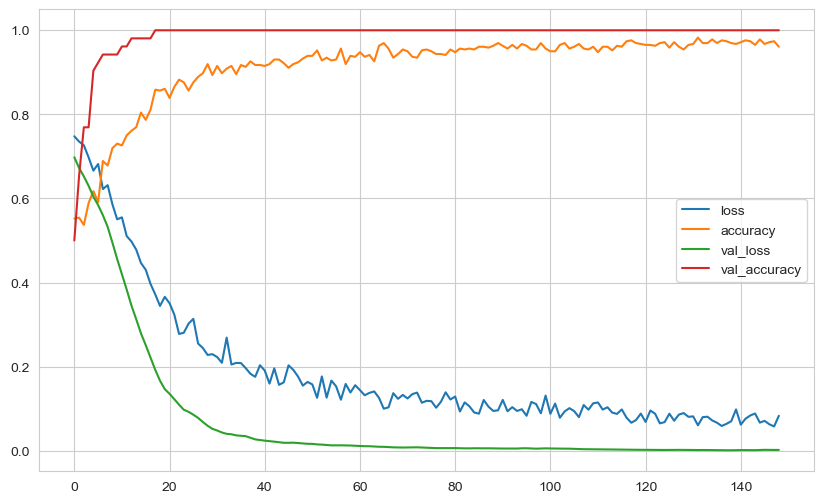

In [70]:
# because of drop out training cannot use all the nodes but validation does. So, the curves split
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3302682340145111
accuracy:  0.9122806787490845


In [72]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.97      0.89      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [73]:
# !pip install scikeras

In [74]:
# from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [75]:
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)
X_traincv = scaler.fit_transform(X_traincv)
X_testcv = scaler.transform(X_testcv)

In [76]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=36, activation="relu"))
    classifier.add(Dense(units=18, activation="relu"))
    classifier.add(Dense(units=9, activation="relu"))
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return classifier

In [77]:
early_stopcv = EarlyStopping(
    monitor="loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [78]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=batch_size, epochs=100, verbose=0
)

scores = cross_validate(
    estimator=classifier_model,
    X=X_traincv,
    y=y_traincv,
    scoring=["accuracy", "precision", "recall", "f1"],
    cv=10,
    return_train_score=True,
    verbose=0,
    fit_params={"callbacks": early_stopcv},
    )

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores
# DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras
# The current version of SciKeras depends on scikit-learn>=1.0.0 and TensorFlow>=2.7.0.

C:\Users\serda\AppData\Local\Temp\ipykernel_40580\4293488228.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(


15/15 [==============================] - 0s 944us/step


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.962,1.000,0.968,1.000,0.968,1.000,0.968,1.000
2,0.962,1.000,0.967,1.000,0.967,1.000,0.967,1.000
3,0.961,1.000,0.946,1.000,1.000,1.000,0.972,1.000
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
5,0.941,1.000,0.919,1.000,1.000,1.000,0.958,1.000
6,0.961,1.000,0.971,1.000,0.971,1.000,0.971,1.000
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
8,0.980,1.000,0.971,1.000,1.000,1.000,0.986,1.000
9,0.980,1.000,0.970,1.000,1.000,1.000,0.985,1.000
10,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [79]:
# Train scores are 1. This is not pleasing
df_scores_summary = pd.concat([df_scores.mean(), df_scores.std()], axis=1).rename(columns={0:"score_mean", 1:"score_std"})
df_scores_summary

,score_mean,score_std
test_accuracy,0.975,0.021
train_accuracy,1.000,0.000
test_precision,0.971,0.026
train_precision,1.000,0.000
test_recall,0.990,0.015
train_recall,1.000,0.000
test_f1,0.981,0.016
train_f1,1.000,0.000


## Hyperparameter Optimization with Optuna

In [80]:
!pip install optuna

In [81]:
#optuna can be used in ML as well
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

c:\Users\serda\anaconda3\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [83]:
# Set the random seed for TensorFlow to ensure reproducibility
tf.random.set_seed(seed)

# This is the metric that will be used to evaluate the model's performance
trial_metric = "accuracy"

# This function creates a model for the machine learning task
def create_model(trial):
    # These are some hyperparameters that we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)  # The number of units in the first layer
    n_units2 = trial.suggest_int("n_units2", 8, 128)  # The number of units in the second layer
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])  # The optimizer to use
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)  # The learning rate for the optimizer
    
    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model

# This function is the objective function to be minimized
def objective(trial):
    model = create_model(trial)  # Create a model using the function defined above
    w0 = trial.suggest_float("w0", 0.01, 5)  # Weight for class 0 for handling class imbalance
    w1 = trial.suggest_float("w1", 0.01, 5)  # Weight for class 1 for handling class imbalance
    # Fit the model to the training data
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val), 
        batch_size=batch_size,  
        epochs=300,  
        callbacks=[early_stop], 
        class_weight={0: w0, 1: w1},  # Class weights
        verbose=0,  # Verbosity mode
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]  # Evaluate the model on the test data
    return score  # Return the score


In [84]:
# Create a study object. The direction "maximize" means that the optimization problem is to maximize the objective function.
study = optuna.create_study(direction="maximize")

# Optimize the study. The objective function (defined earlier) is the function to be optimized, and n_trials is the number of trials.
study.optimize(objective, n_trials=10)

# Print the best parameters found during the optimization. These are the parameters that gave the highest return value of the objective function.
study.best_params

[I 2024-04-25 20:08:13,451] A new study created in memory with name: no-name-302a5cff-f338-4e0f-a883-91ddcef4a5c8
c:\Users\serda\anaconda3\envs\DL\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
c:\Users\serda\anaconda3\envs\DL\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
c:\Users\serda\anaconda3\envs\DL\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimize

Restoring model weights from the end of the best epoch: 62.
Epoch 72: early stopping


[I 2024-04-25 20:08:22,512] Trial 0 finished with value: 0.9807692170143127 and parameters: {'n_units1': 33, 'n_units2': 128, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0002483005250051818, 'w0': 3.4262186957183647, 'w1': 4.905761649419445}. Best is trial 0 with value: 0.9807692170143127.


Restoring model weights from the end of the best epoch: 258.
Epoch 268: early stopping


[I 2024-04-25 20:08:50,611] Trial 1 finished with value: 1.0 and parameters: {'n_units1': 117, 'n_units2': 13, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0003639052145517506, 'w0': 3.345682604433876, 'w1': 4.21539442261232}. Best is trial 1 with value: 1.0.
[I 2024-04-25 20:09:21,180] Trial 2 finished with value: 0.9615384340286255 and parameters: {'n_units1': 103, 'n_units2': 114, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 1.4366739704415863e-05, 'w0': 0.9034502566341238, 'w1': 4.7719468797608995}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 123.
Epoch 133: early stopping


[I 2024-04-25 20:09:36,840] Trial 3 finished with value: 1.0 and parameters: {'n_units1': 105, 'n_units2': 31, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0006923719831200204, 'w0': 3.7571906326806914, 'w1': 1.0270359361446475}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping


[I 2024-04-25 20:09:39,839] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 68, 'n_units2': 98, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.10931190667993505, 'w0': 0.06731094898387356, 'w1': 1.745440645464455}. Best is trial 1 with value: 1.0.
[I 2024-04-25 20:10:11,436] Trial 5 finished with value: 1.0 and parameters: {'n_units1': 113, 'n_units2': 112, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 4.2671129583065644e-05, 'w0': 0.8331860063638121, 'w1': 1.7199647069268318}. Best is trial 1 with value: 1.0.
[I 2024-04-25 20:10:42,090] Trial 6 finished with value: 0.9230769276618958 and parameters: {'n_units1': 79, 'n_units2': 121, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.00315783790539666, 'w0': 3.4975856787108173, 'w1': 1.5761987542248899}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 227.
Epoch 237: early stopping


[I 2024-04-25 20:11:16,611] Trial 7 finished with value: 1.0 and parameters: {'n_units1': 67, 'n_units2': 14, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.013704748479185798, 'w0': 0.5602355205365214, 'w1': 3.6710842270092736}. Best is trial 1 with value: 1.0.
[I 2024-04-25 20:11:47,626] Trial 8 finished with value: 1.0 and parameters: {'n_units1': 52, 'n_units2': 71, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.08263182080277567, 'w0': 2.5788262907171933, 'w1': 1.2300602435876664}. Best is trial 1 with value: 1.0.
[I 2024-04-25 20:12:21,390] Trial 9 finished with value: 0.5961538553237915 and parameters: {'n_units1': 108, 'n_units2': 118, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 1.1862497502423963e-05, 'w0': 4.353459827614733, 'w1': 4.223739410268237}. Best is trial 1 with value: 1.0.


{'n_units1': 117,
 'n_units2': 13,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop,
 'learning_rate': 0.0003639052145517506,
 'w0': 3.345682604433876,
 'w1': 4.21539442261232}

In [85]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/300


15/15 [==============================] - 1s 21ms/step - loss: 0.6695 - Accuracy: 0.6022 - val_loss: 0.6055 - val_Accuracy: 0.7692
Epoch 2/300
15/15 [==============================] - 0s 9ms/step - loss: 0.5379 - Accuracy: 0.8522 - val_loss: 0.4943 - val_Accuracy: 0.8654
Epoch 3/300
15/15 [==============================] - 0s 9ms/step - loss: 0.4387 - Accuracy: 0.9152 - val_loss: 0.3996 - val_Accuracy: 0.9231
Epoch 4/300
15/15 [==============================] - 0s 9ms/step - loss: 0.3622 - Accuracy: 0.9326 - val_loss: 0.3223 - val_Accuracy: 0.9423
Epoch 5/300
15/15 [==============================] - 0s 8ms/step - loss: 0.3009 - Accuracy: 0.9413 - val_loss: 0.2614 - val_Accuracy: 0.9423
Epoch 6/300
15/15 [==============================] - 0s 8ms/step - loss: 0.2516 - Accuracy: 0.9478 - val_loss: 0.2141 - val_Accuracy: 0.9615
Epoch 7/300
15/15 [==============================] - 0s 9ms/step - loss: 0.2132 - Accuracy: 0.9543 - val_loss: 0.1747 - val_Accuracy: 1.0000
Epoch 8/300
15/15 [=====

In [86]:
history = model.history.history

<Axes: >

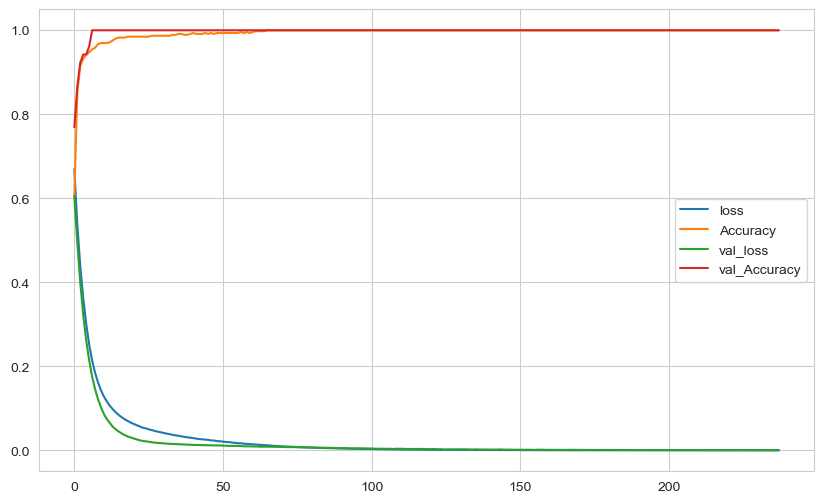

In [87]:
loss_df = pd.DataFrame(history)
loss_df.plot()

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [88]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
[[19  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.94      0.89      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

2/2 [==============================] - 0s 3ms/step


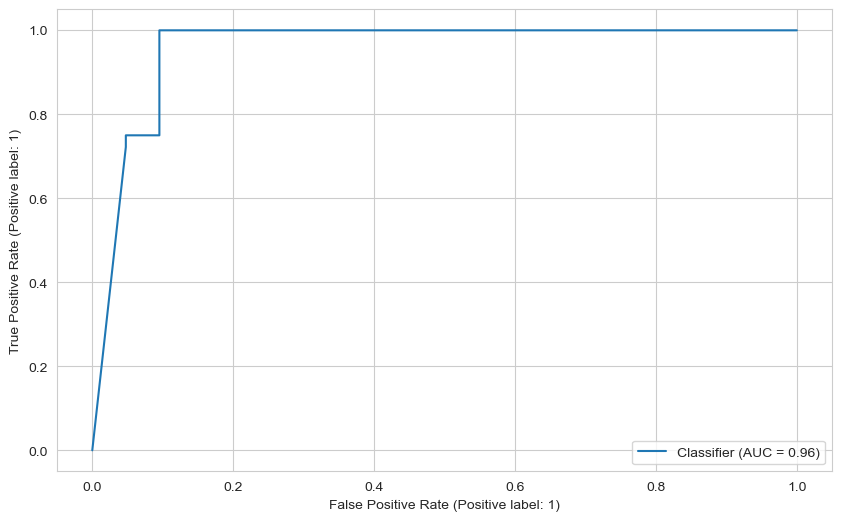

In [89]:
# if the data is imbalanced we check precision recall curve. But here we check roccurve. it is aroun 0.8 which means good
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.9576719576719577

# Final model

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 25ms/step - loss: 0.6400 - recall: 0.6199 - val_loss: 0.5688 - val_recall: 0.7778
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4918 - recall: 0.8910 - val_loss: 0.4739 - val_recall: 0.7778
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3937 - recall: 0.9315 - val_loss: 0.4010 - val_recall: 0.8333
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3208 - recall: 0.9502 - val_loss: 0.3423 - val_recall: 0.8333
Epoch 5/100
 1/16 [>.............................] - ETA: 0s - loss: 0.2371 - recall: 0.9412

16/16 [==============================] - 0s 13ms/step - loss: 0.2635 - recall: 0.9564 - val_loss: 0.2951 - val_recall: 0.8611
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2195 - recall: 0.9657 - val_loss: 0.2574 - val_recall: 0.8333
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1854 - recall: 0.9688 - val_loss: 0.2281 - val_recall: 0.8611
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1591 - recall: 0.9751 - val_loss: 0.2072 - val_recall: 0.8889
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1382 - recall: 0.9751 - val_loss: 0.1927 - val_recall: 0.9167
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1217 - recall: 0.9813 - val_loss: 0.1800 - val_recall: 0.9167
Epoch 11/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1087 - recall: 0.9813 - val_loss: 0.1738 - val_recall: 0.9167
Epoch 12/100
16/16 [==============================

In [93]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



## Saving Final Model and Scaler

In [94]:
import pickle

pickle.dump(scaler, open("scaler_cancer", "wb"))

In [95]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.15182076394557953
accuracy:  0.9166666865348816


In [96]:
model.save("model_cancer.h5")

## Loading Model and Scaler

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model_cancer = load_model("model_cancer.h5")
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [99]:
single_patient = df.drop("Cancer", axis=1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [100]:
# robust scaler output
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[ 1.15136778, -1.48543689,  1.20534045,  2.71425403,  2.31678008,
         2.1138948 ,  1.87334315,  1.98621482,  3.25096687, -0.29431386,
         0.01542504,  1.4730264 ,  0.99297715,  0.7053286 ,  1.32475884,
         1.27526058,  1.86044444, -0.95091662,  1.03772003,  2.37830028,
         1.7587584 ,  1.69972088,  2.52094333,  1.88009187]])

In [101]:
#we don't want float, so convert to int
(model_cancer.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 76ms/step


array([[0]])

In [102]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [103]:
#for tabular data we don't need DL. As we see below without any hyperparameter tuning we have best results
from sklearn.linear_model import LogisticRegression

In [104]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluation
y_pred = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)
print("Test")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Test
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

Train
[[187   4]
 [  2 319]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       191
           1       0.99      0.99      0.99       321

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512



### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluation
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
print("Test")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Test
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

Train
[[191   0]
 [  0 321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       321

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



END OF THE PROJECT